In [1]:
from PIL import Image
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import torch
import matplotlib.pyplot as plt

def show_image(array_img):
    if isinstance(array_img, torch.Tensor):
        array_img = array_img.detach().cpu().numpy()
    if isinstance(array_img, np.ndarray) and array_img.dtype == np.float32:
        array_img = (array_img * 255).astype(np.uint8)
    display(Image.fromarray(array_img))

# Draft

In [3]:
# from huggingface_hub import hf_hub_download

# hf_hub_download(repo_id="lllyasviel/ControlNet", filename="training/fill50k.zip")

'/root/.cache/huggingface/hub/models--lllyasviel--ControlNet/snapshots/e78a8c4a5052a238198043ee5c0cb44e22abb9f7/training/fill50k.zip'

In [3]:
# from huggingface_hub import hf_hub_download

# hf_hub_download(repo_id="stable-diffusion-v1-5/stable-diffusion-v1-5", filename="v1-5-pruned.safetensors")

'/root/.cache/huggingface/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/f03de327dd89b501a01da37fc5240cf4fdba85a1/v1-5-pruned.safetensors'

In [2]:
from tutorial_dataset import MyDataset

dataset = MyDataset()
print(len(dataset))

item = dataset[1234]
jpg = item['jpg']
txt = item['txt']
hint = item['hint']
print(txt)
print(jpg.shape)
print(hint.shape)

/opt/conda/envs/control/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


50000
burly wood circle with orange background
(512, 512, 3)
(512, 512, 3)


In [6]:
# import torch
# from safetensors.torch import load_file

# ckpt = load_file("/home/asharshavin/other/diffusion/ControlNet/models/v1-5-pruned.safetensors")

# torch.save(ckpt, "/home/asharshavin/other/diffusion/ControlNet/models/v1-5-pruned.ckpt")
# model = torch.load("/home/asharshavin/other/diffusion/ControlNet/models/v1-5-pruned.ckpt")
# model

# Inference

In [ ]:
from cldm.model import create_model, load_state_dict

resume_path  = "/home/asharshavin/other/diffusion/ControlNet/lightning_logs/version_0/checkpoints/N-Step-Checkpoint_epoch=0_global_step=1500.ckpt"

model = create_model('./models/cldm_v15.yaml') #.cpu()
model.load_state_dict(load_state_dict(resume_path, location='cuda'))
model.eval()
model.to("cuda")


ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


/usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:392: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cpu

Loaded model config from [./models/cldm_v15.yaml]


/home/asharshavin/other/diffusion/ControlNet/cldm/model.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = get_state_dict(torch.load(ckpt_path, map_location=t

Loaded state_dict from [/home/asharshavin/other/diffusion/ControlNet/lightning_logs/version_0/checkpoints/N-Step-Checkpoint_epoch=0_global_step=1500.ckpt]


ControlLDM(
  (model): DiffusionWrapper(
    (diffusion_model): ControlledUnetModel(
      (time_embed): Sequential(
        (0): Linear(in_features=320, out_features=1280, bias=True)
        (1): SiLU()
        (2): Linear(in_features=1280, out_features=1280, bias=True)
      )
      (input_blocks): ModuleList(
        (0): TimestepEmbedSequential(
          (0): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1-2): 2 x TimestepEmbedSequential(
          (0): ResBlock(
            (in_layers): Sequential(
              (0): GroupNorm32(32, 320, eps=1e-05, affine=True)
              (1): SiLU()
              (2): Conv2d(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
            (h_upd): Identity()
            (x_upd): Identity()
            (emb_layers): Sequential(
              (0): SiLU()
              (1): Linear(in_features=1280, out_features=320, bias=True)
            )
            (out_layers): Sequential(
       

In [41]:
model.device

device(type='cuda', index=0)

In [2]:
from torch.utils.data import DataLoader
from tutorial_dataset import MyDataset

dataset = MyDataset()
dataloader = DataLoader(dataset, num_workers=0, batch_size=1, shuffle=False)

In [6]:
dataset[0]["hint"].shape

(512, 512, 3)

In [34]:
di = iter(dataloader)
batch = next(di)
batch = next(di)
for k in batch.keys():
    if isinstance(batch[k], torch.Tensor):
        batch[k] = batch[k].to("cuda")

light coral circle with white background


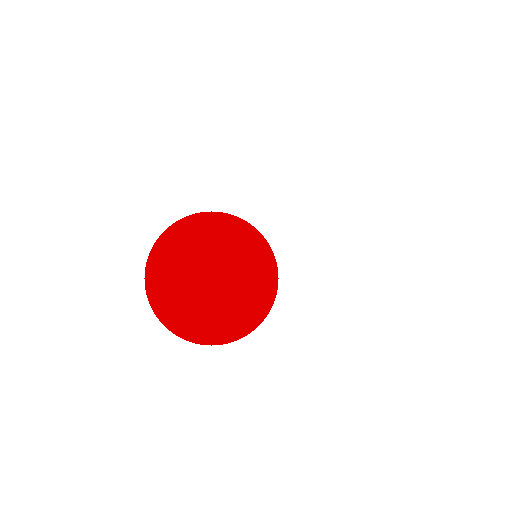

In [36]:
print(dataset[1]["txt"])
show_image(dataset[1]["jpg"])

light coral circle with white background


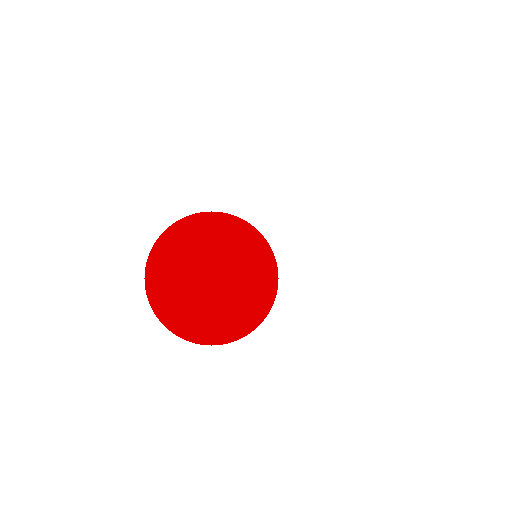

In [37]:
print(batch["txt"][0])
show_image(batch["jpg"][0])

In [42]:
res = model.log_images(batch)

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


In [44]:
res.keys()

dict_keys(['reconstruction', 'control', 'conditioning', 'samples_cfg_scale_9.00'])

In [49]:
res["conditioning"].shape

torch.Size([1, 3, 512, 512])

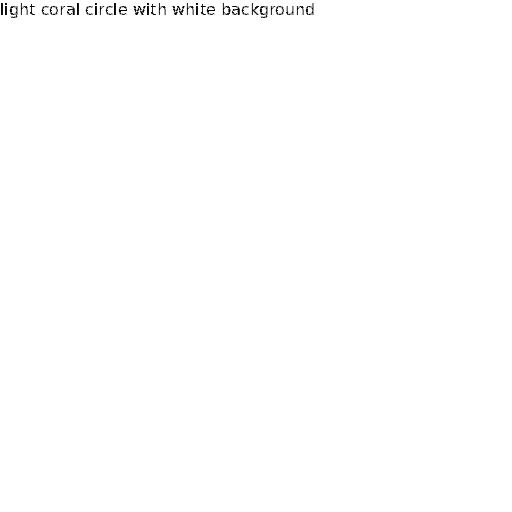

In [51]:
show_image(res["conditioning"][0].permute(1,2,0))

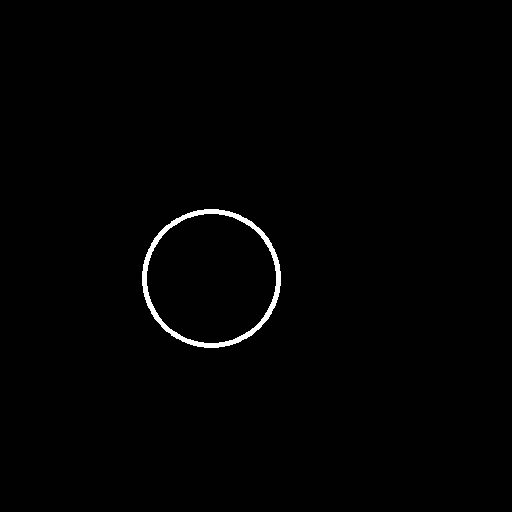

In [52]:
show_image(res["control"][0].permute(1,2,0))

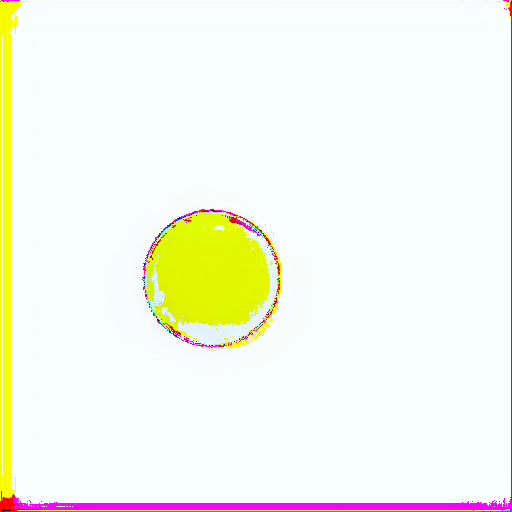

In [53]:
show_image(res["reconstruction"][0].permute(1,2,0))

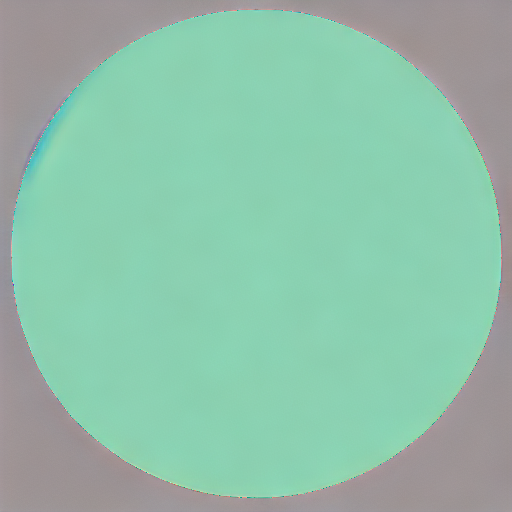

In [54]:
show_image(res["samples_cfg_scale_9.00"][0].permute(1,2,0))

# Prepare dataset

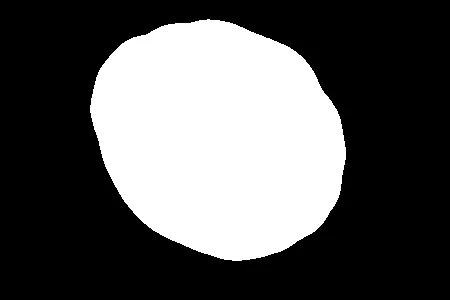

In [7]:
mask = Image.open("/home/asharshavin/other/diffusion/rotten_tangerines_dataset/masks/mask_01.webp") #.convert('L')
mask

In [8]:
np_mask = np.array(mask)
np_mask.shape

(300, 450, 3)

[  0   1   2   3   5   6   7   8   9  10  12  13  14  15  16 238 239 240
 241 242 243 245 246 247 248 249 250 251 253 254 255]


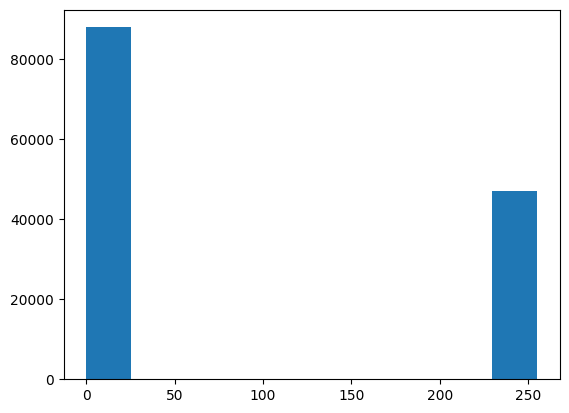

In [17]:
print(np.unique(np_mask))
plt.hist(np_mask.flatten(), bins=10)
plt.show()

In [4]:
np.max(np_mask), np.min(np_mask)

(255, 0)

In [5]:
np_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
src = dataset[0]["hint"]
np.max(src), np.min(src)

(1.0, 0.0)

In [12]:
trg = dataset[0]["jpg"]
np.max(trg), np.min(trg)

(0.9843137, 0.33333337)

In [24]:
from AgroQualifier.mold_dataset import MoldDataset

data_dir = "/home/asharshavin/other/diffusion/rotten_tangerines_dataset"
mold_dataset = MoldDataset(data_dir)
len(mold_dataset)

54

In [26]:
train_dataset, test_dataset = torch.utils.data.random_split(mold_dataset, [0.9, 0.1])
len(train_dataset), len(test_dataset)

(49, 5)

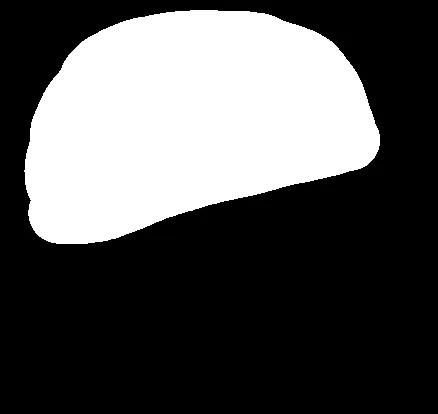

In [3]:
show_image(mold_dataset[0]["hint"])

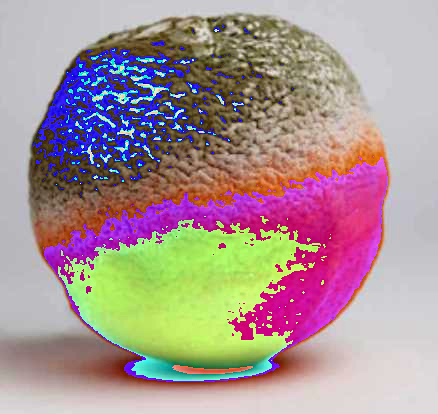

In [4]:
show_image(mold_dataset[0]["jpg"])

[0.         0.00392157 0.00784314 0.01176471 0.01960784 0.02352941
 0.02745098 0.03137255 0.03529412 0.03921569 0.04705882 0.05098039
 0.05490196 0.05882353 0.0627451  0.07450981 0.9411765  0.94509804
 0.9490196  0.9529412  0.9607843  0.9647059  0.96862745 0.972549
 0.9764706  0.98039216 0.9843137  0.99215686 0.99607843 1.        ]


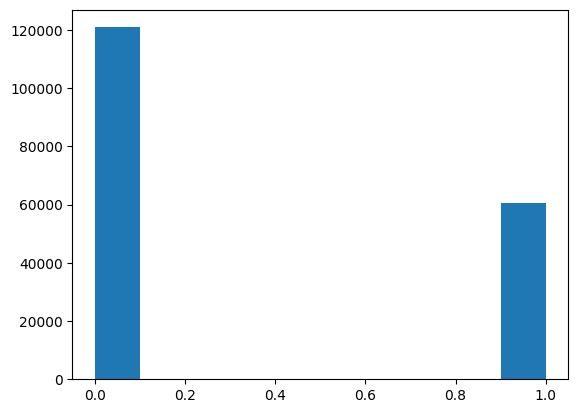

In [13]:
print(np.unique(mold_dataset[0]["hint"].ravel()))
plt.hist(mold_dataset[0]["hint"].ravel(), bins=10)
plt.show()

In [19]:
test = (mold_dataset[0]["hint"]) * 255
test = test.astype(np.uint8)
np.max(test), np.min(test)

(255, 0)

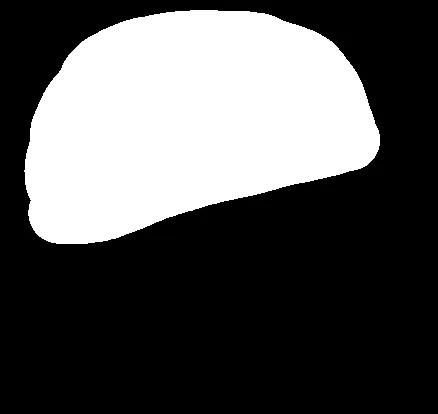

In [21]:
show_image(test)

254 22


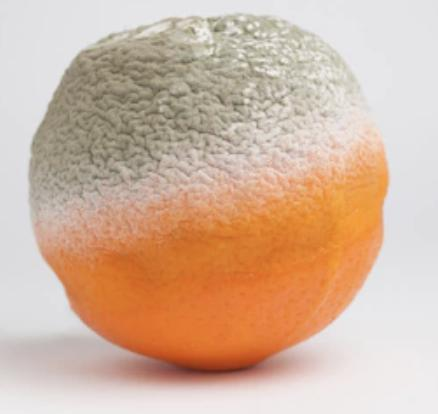

In [22]:
test = (mold_dataset[0]["jpg"] + 1) * 127.5
test = test.astype(np.uint8)
print(np.max(test), np.min(test))

show_image(test)

In [23]:
len(dataset)

NameError: name 'dataset' is not defined